# 1.计算答题时间并画出直方图观察分布情况

[59, 16, 21, 12, 9, 12, 109, 11, 17, 13, 18, 81, 17, 16, 66, 11, 8, 13, 22, 19, 15, 15, 11, 21, 62, 17, 14, 21, 15, 20, 22, 13, 16, 15, 17, 43, 6, 14, 13, 16, 14, 17, 35, 22, 18, 81, 21, 16, 13, 13, 9, 15, 15, 14, 98, 71, 16, 20, 12, 10, 10, 21, 14, 74, 87, 51, 14, 15, 9, 55, 12, 15, 49, 12, 15, 11, 14, 20, 58, 15, 21, 12, 9, 12, 17, 12, 18, 90, 130, 13, 18, 110, 6, 80, 58, 15, 23, 120, 15, 15, 75, 34, 19, 95, 21, 15, 21, 135, 97, 92, 87, 9, 14, 14, 102, 84, 17, 37, 139, 120, 10, 21, 98, 65, 22, 17, 92, 15, 14, 16, 22, 13, 11, 39, 93, 15, 64, 81, 30, 43, 84, 15, 43, 23, 20, 55, 15, 21, 12, 9, 12, 17, 11, 17, 13, 18, 16, 0, 0, 23, 14, 20, 22, 13, 16, 19, 21, 0, 0, 6, 14, 14, 16, 14, 21, 16, 13, 15, 14, 15, 12, 10, 21, 15, 20, 30, 11, 0, 16, 9, 14, 14, 30, 12, 12, 15, 11, 14, 20]


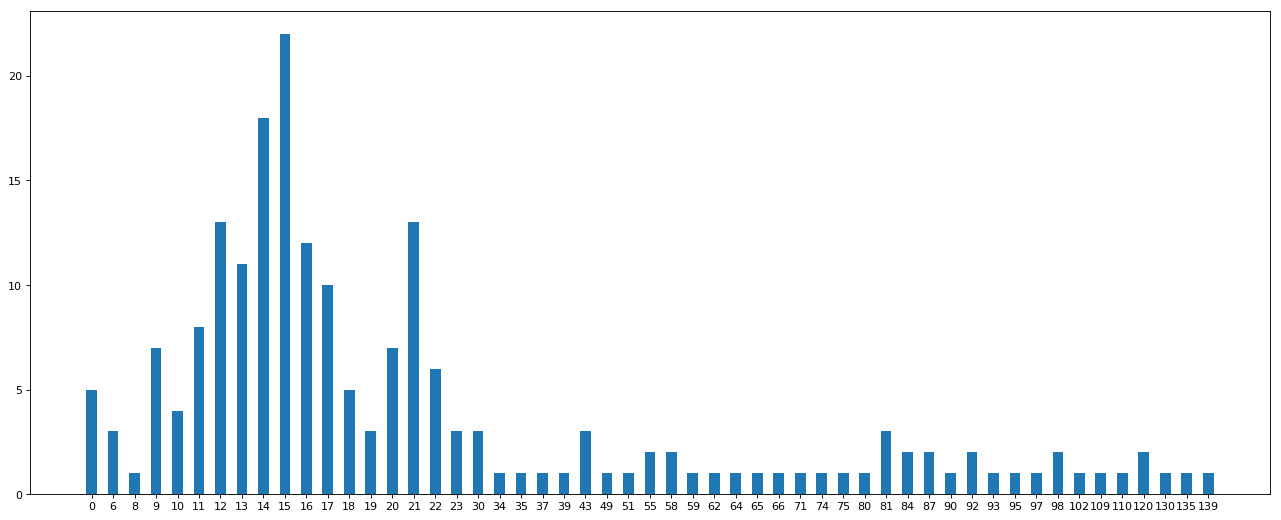

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

#选择要爬的网址
url = 'http://yang.lzu.edu.cn/data/index.txt'
response = requests.get(url)
response.encoding = 'utf-8'

#获取网页源码
html = response.text

data=html.split('\n')
data.remove("./accelerometer/anxiety/female")
data.remove("./accelerometer/health/female")
data.remove("./device_motion/anxiety/female")
data.remove("./device_motion/health/female")
data.remove("./gyroscope/anxiety/female")
data.remove("./gyroscope/health/female")
data.pop()


time=[]
var=[]
for fn in data:
    fname=fn.strip('./').replace('/','_')
    df=pd.read_json("E:/homework10/原数据/"+fname)
    dff=df.iloc[500:]
    if df.empty:
        time.append(0)
        var.append(0)
    else:
        time.append(df.iloc[:,0].size//(5*60))
        var.append(dff.iloc[:,0].var())

print(time)
ttt={}

for i in time:
    if i in ttt:
        ttt[i]+=1
    else:
        ttt[i]=1

x=sorted(ttt.keys())
y=[]
for i in x:
    y.append(ttt[i])

x1=range(len(x))
plt.figure(figsize=(20, 8), dpi=80)

plt.bar(x1,y,width=0.5)
plt.xticks(x1, x)

plt.show()


# 2.计算方差观察数据的离散程度

（方差非常小的即数据离散程度小，表明答题人员将手机放置桌子上基本没动）

x    0.001998
y    0.001499
z    0.000627
dtype: float64

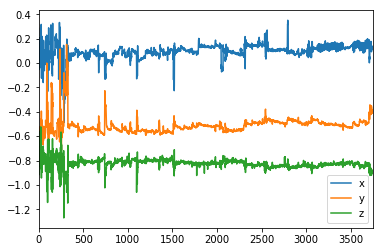

In [14]:
df1=pd.read_json("E:/homework10/原数据/accelerometer_anxiety_female_20191109150824_974_accelerometer.json")
df1.plot()
df1.iloc[500:].var()

x    0.000016
y    0.000007
z    0.000045
dtype: float64

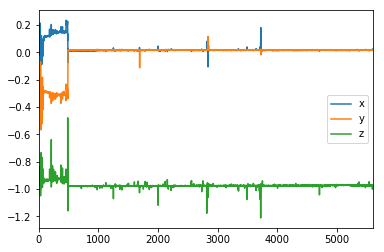

In [15]:
df2=pd.read_json("E:/homework10/原数据/accelerometer_anxiety_female_20191110161313_1383_accelerometer.json")
df2.plot()
df2.iloc[500:].var()

### 由上边两个例子可得出以下结论：
（1）前500条数据可能是答题人员还没开始答题就已经测得的数据

（2）当三轴加速度x的方差小于0.001时，答题人员很有可能将手机置于桌子上

(array([23., 16., 12.,  6.,  7.,  2.,  5.,  4.,  1.,  2.]),
 array([1.64468097e-05, 3.60242680e-03, 7.18840678e-03, 1.07743868e-02,
        1.43603668e-02, 1.79463467e-02, 2.15323267e-02, 2.51183067e-02,
        2.87042867e-02, 3.22902667e-02, 3.58762467e-02]),
 <a list of 10 Patch objects>)

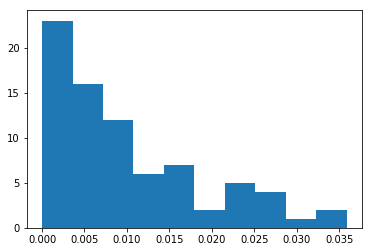

In [16]:
"""
基于x的方差，绘制accelerometer的直方图
"""
plt.hist(var[0:78])

alpha     2.882440
beta     25.206917
gamma     3.875292
dtype: float64

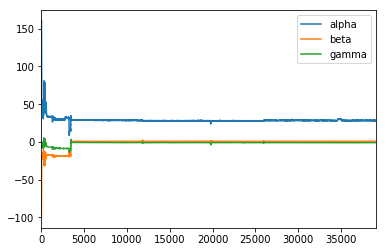

In [28]:
df3=pd.read_json("E:/homework10/原数据/device_motion_anxiety_female_20191110161313_1383_device_motion.json")
df3.plot()
df3.iloc[500:].var()

alpha    603.212732
beta      26.952555
gamma     25.153851
dtype: float64

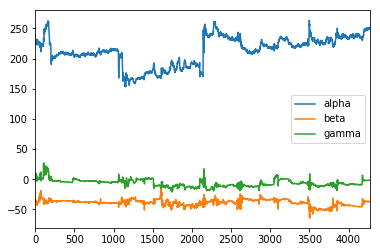

In [26]:
df4=pd.read_json("E:/homework10/原数据/device_motion_health_female_20191107150410_145_device_motion.json")
df4.plot()
df4.iloc[500:].var()

### 可得结论：
当device_motion的alpha参数的方差小于3时，可认为答题者将手机置于桌子上

(array([40.,  9.,  6.,  2.,  3.,  0.,  3.,  0.,  2.,  2.]),
 array([5.65626572e-01, 2.94024267e+03, 5.87991970e+03, 8.81959674e+03,
        1.17592738e+04, 1.46989508e+04, 1.76386279e+04, 2.05783049e+04,
        2.35179819e+04, 2.64576590e+04, 2.93973360e+04]),
 <a list of 10 Patch objects>)

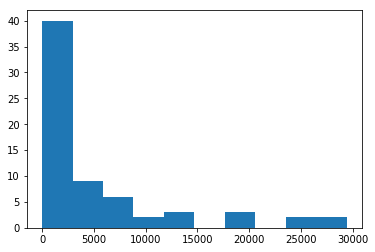

In [19]:
"""
基于alpha的方差，绘制device_motion的直方图
"""
plt.hist(var[78:145])

(array([28., 12.,  6.,  4.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([0.        , 0.01270683, 0.02541367, 0.0381205 , 0.05082734,
        0.06353417, 0.07624101, 0.08894784, 0.10165468, 0.11436151,
        0.12706835]),
 <a list of 10 Patch objects>)

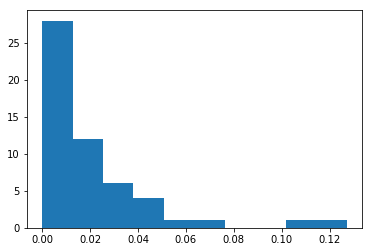

In [27]:
"""
基于x的方差，绘制gyroscope的直方图
"""
plt.hist(var[145:199])